In [1]:
import pathlib
import pandas as pd
from datetime import datetime

In [2]:
indf = pd.read_csv('filtered_aq_soldb.csv')

In [3]:
indf.shape

(8797, 7)

In [15]:
indf

,Unnamed: 0,ID,Name,InChIKey,SMILES,Solubility,natoms
0,1,A-4,Benzo[cd]indol-2(1H)-one,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,20.0
1,2,A-5,4-chlorobenzaldehyde,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,14.0
2,4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,61.0
3,5,A-10,vinyltoluene,JZHGRUMIRATHIU-UHFFFAOYSA-N,Cc1cccc(C=C)c1,-3.123150,19.0
4,6,A-11,3-(3-ethylcyclopentyl)propanoic acid,WVRFSLWCFASCIS-UHFFFAOYSA-N,CCC1CCC(CCC(O)=O)C1,-3.286116,30.0
...,...,...,...,...,...,...,...
8792,9977,I-84,tetracaine,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,43.0
8793,9978,I-85,tetracycline,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,56.0
8794,9979,I-86,thymol,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,25.0
8795,9980,I-93,verapamil,SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,71.0


In [6]:
savedir = pathlib.Path(
    'completed_pickles')
df_paths = [x for x in savedir.glob('*pkl')]
print(len(df_paths))
len(df_paths) / indf.shape[0]

8796


0.9998863248834831

In [7]:
print(datetime.now())

2024-10-19 22:33:19.541091


In [8]:
last_dt = datetime.fromisoformat('2024-10-16 14:21:22.921116')
for p in df_paths:
    dt = datetime.fromtimestamp(p.stat().st_mtime)
    if last_dt < dt:
        last_dt = dt
    #print(p, dt)
print(last_dt)

2024-10-19 17:48:40.786993


In [9]:
dfs = [pd.read_pickle(x) for x in savedir.glob('*pkl')]

In [10]:
compiled_df = pd.concat(dfs)

In [11]:
compiled_df.columns

Index(['energy', 'free_energy', 'forces', 'dipole', 'charges', 'xtb_mol2',
       'uff_energy', 'uff_mol2', 'smiles', 'total_charge',
       'total_unpaired_electrons', 'n_atoms', 'xtb_solvent', 'sas',
       'born_radii', 'error'],
      dtype='object')

In [12]:
compiled_df.total_charge.value_counts()

total_charge
 0.0    214758
-1.0       999
 2.0       723
 1.0       302
-2.0       174
Name: count, dtype: int64

In [13]:
compiled_df.error.value_counts()

error
                                216956
XTB-Python Relaxation Failed         1
Name: count, dtype: int64

In [16]:
compiled_df[compiled_df.error != ''].error

21    XTB-Python Relaxation Failed
Name: error, dtype: object

In [17]:
compiled_df[compiled_df.error != ''].smiles

21    C(Cc1ccccc1)c2ccccc2
Name: smiles, dtype: object

In [108]:
compiled_df.smiles.value_counts()

smiles
CCCCCCCCCCCCCCCCCCCCO                                          50
CCO[P](=O)(OCC)O[P](=O)(OCC)OCC                                50
CSCCC(NC(C)=O)C(=O)O                                           50
FC(F)C(F)(F)OC1=C(Cl)C=C(NC(=O)NC(=O)C2=C(F)C=CC=C2F)C=C1Cl    50
Nc1ccc(cc1Cl)C2(c3ccc(N)c(Cl)c3)c4ccccc4c5ccccc25              50
                                                               ..
CCOC(=O)COC(=O)C1=CC=CC=C1OC(C)=O                               1
Cc1ccc2C(=O)c3ccccc3C(=O)c2c1N                                  1
CC12CCC3C(CCC4=CC(=CC=C34)O)C1CCC2(O)C#C                        1
CC1=C2C=CC3=C(C=CC=C3)C2=C(C)C4=C1C=CC=C4                       1
O=C1C=CC(=O)C=C1                                                1
Name: count, Length: 8293, dtype: int64

In [21]:
mindf = compiled_df.sort_values('energy').drop_duplicates('smiles')

In [23]:
mindf.shape

(8796, 16)

In [24]:
merged = pd.merge(mindf,indf,left_on='smiles',right_on='SMILES')

In [28]:
merged.to_pickle('merged_all_data.pkl')

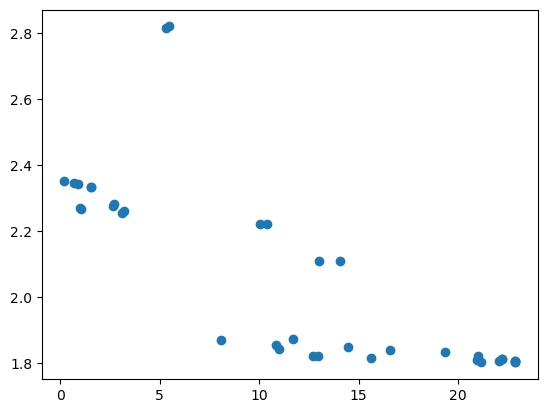

In [105]:
import matplotlib.pyplot as plt
plt.scatter(compiled_df.iloc[0]['sas'],
            compiled_df.iloc[0]['born_radii'])